<div align="center" style=" font-size: 80%; text-align: center; margin: 0 auto">
<img src="https://raw.githubusercontent.com/Explore-AI/Pictures/master/Python-Notebook-Banners/Examples.png"  style="display: block; margin-left: auto; margin-right: auto;";/>
</div>

# Introduction

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



## Installing packages


In [2]:

%pip install surprise

# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

Note: you may need to restart the kernel to use updated packages.


## Reading in data

In [3]:
train_df = pd.read_csv('train.csv')
movies_df = pd.read_csv('movies.csv')
imdb_df = pd.read_csv('imdb_data.csv')
test_df = pd.read_csv('test.csv')
links_df = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
genome_scores = pd.read_csv('genome_scores.csv')
genome_tags = pd.read_csv('genome_tags.csv')
sample_submissions = pd.read_csv('sample_submission.csv')

In [4]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies_df.shape

(62423, 3)

## EDA


### Outliers
- **Identify outliers**: Outliers are data points that differ significantly from other observations. They can skew and mislead the training process of a machine learning model.
- **Detecting outliers**: Use statistical methods such as Z-scores or IQR (Interquartile Range) to detect outliers.
- **Handling outliers**: Decide whether to remove or transform the outliers depending on their impact on the dataset.

### Understanding Relationships Between Various Attributes and Structure of the Data
- **Correlation Analysis**: Use correlation matrices to understand the relationships between numerical attributes.
- **Visualization Techniques**: Employ scatter plots, pair plots, and heatmaps to visualize and explore relationships.
- **Data Structure**: Understand the structure of the data, including the distribution of values and the presence of any missing values.

### Recognizing Important Variables
- **Feature Importance**: Use techniques like Random Forests, Gradient Boosting, or SHAP values to determine feature importance.
- **Domain Knowledge**: Incorporate domain expertise to identify which variables are likely to be important.
- **Statistical Tests**: Conduct statistical tests to identify variables that have significant effects on the target variable.

By understanding the data through these steps, we ensure a robust foundation for building and evaluating machine learning models.


**Lets Check whether or not we have any missing values in our dataset**

In [6]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


## Data Preparation

Data preparation is the process of preparing raw data so that it is suitable for further processing and analysis. Key steps include:

- **Collecting**: Gathering raw data from various sources.
- **Cleaning**: Removing or correcting any errors or inconsistencies in the data. This includes handling missing values, correcting data types, and removing duplicates.
- **Labeling**: Annotating data with labels that are required for supervised machine learning tasks. This involves identifying and marking the target variable.
- **Transforming**: Converting raw data into a format that is suitable for analysis. This includes normalization, scaling, encoding categorical variables, and feature engineering.
- **Exploring**: Analyzing the data to understand its structure and relationships. This step includes generating descriptive statistics and visualizing the data to identify patterns and insights.
- **Visualizing**: Creating graphical representations of the data to better understand distributions, trends, and relationships among variables. Common techniques include histograms, bar charts, scatter plots, and heatmaps.

By following these steps, raw data is transformed into a structured format that is ready for machine learning algorithms and further analysis.


In [7]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [8]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [9]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [10]:
# Dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


**Lets plot genres from most common to least common**

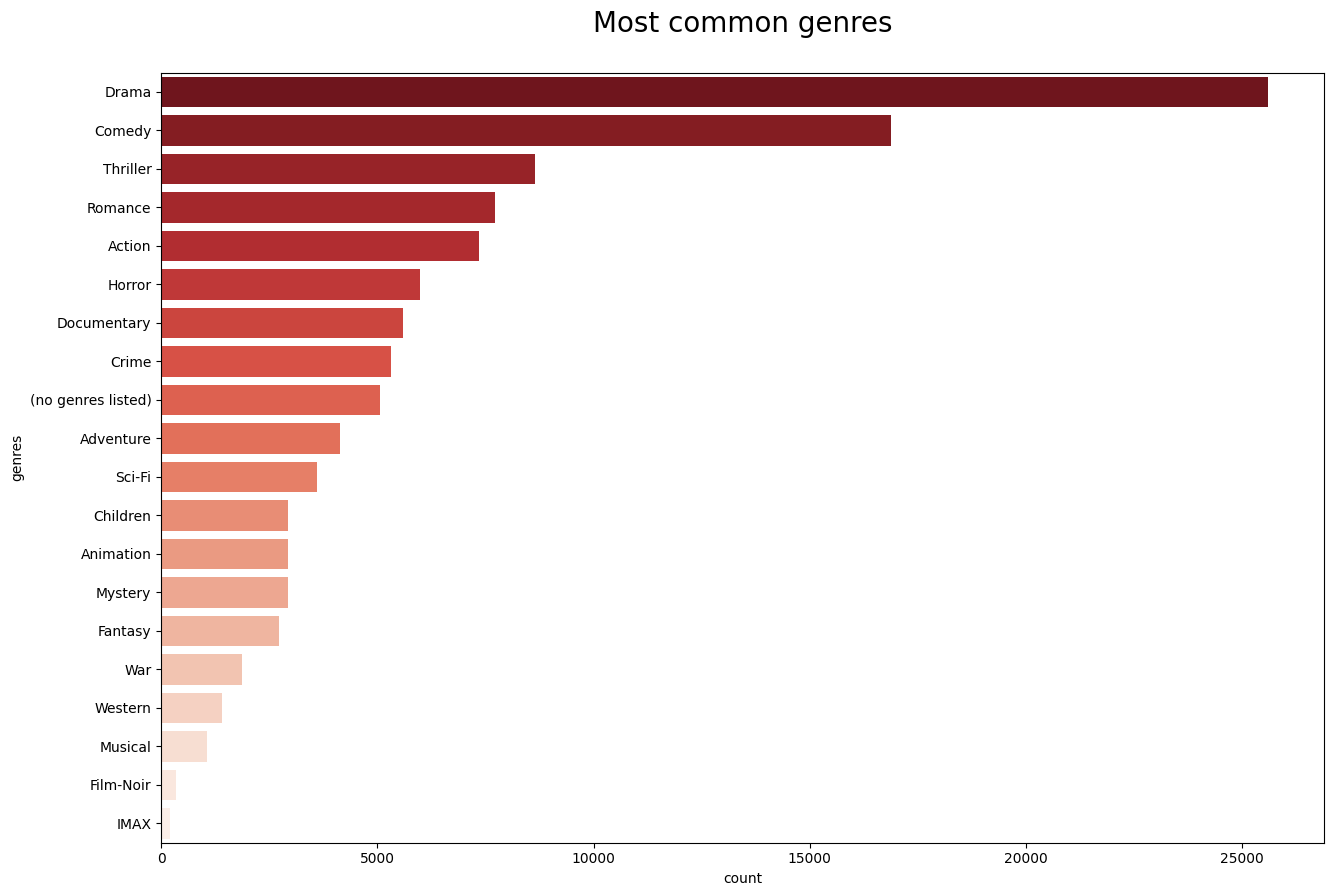

In [11]:
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

## Modelling phase



In [12]:
# Preparing the training data for collaborative filtering
# Checking the structure of train_df to understand the columns
print("Train DataFrame columns:", train_df.columns.tolist())
print("Train DataFrame shape:", train_df.shape)
print("\nFirst few rows of train_df:")
print(train_df.head())

# Checking the rating scale in the training data
print("\nRating statistics:")
print(train_df['rating'].describe())
print("\nRating range:", train_df['rating'].min(), "to", train_df['rating'].max())

# Checking for any missing values in training data
print("\nMissing values in train_df:")
print(train_df.isnull().sum())

# Defining the Reader with the appropriate rating scale
# Ratings are typically on a scale of 0.5 to 5.0 (in increments of 0.5)
rating_min = train_df['rating'].min()
rating_max = train_df['rating'].max()
reader = Reader(rating_scale=(rating_min, rating_max))

# Loading the training data into Surprise Dataset format
# Assuming train_df has columns: userId, movieId, rating
data = Dataset.load_from_df(train_df[['userId', 'movieId', 'rating']], reader)

print(f"\nDataset loaded successfully with rating scale: ({rating_min}, {rating_max})")


Train DataFrame columns: ['userId', 'movieId', 'rating', 'timestamp']
Train DataFrame shape: (10000038, 4)

First few rows of train_df:
   userId  movieId  rating   timestamp
0    5163    57669     4.0  1518349992
1  106343        5     4.5  1206238739
2  146790     5459     5.0  1076215539
3  106362    32296     2.0  1423042565
4    9041      366     3.0   833375837

Rating statistics:
count    1.000004e+07
mean     3.533395e+00
std      1.061124e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

Rating range: 0.5 to 5.0

Missing values in train_df:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Dataset loaded successfully with rating scale: (0.5, 5.0)


## Lets Build and Evaluate Our Model

In [ ]:
# Splitting the data into training and validation sets for model evaluation
trainset, valset = train_test_split(data, test_size=0.2, random_state=42)

# Training the SVD model with optimized parameters
print("Training SVD model...")
svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.08, random_state=42)
svd.fit(trainset)

# Making predictions on the validation set
print("Making predictions on validation set...")
predictions = svd.test(valset)

# Computing and printing the RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")

# Displaying sample predictions
pred_df = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
print("\nSample predictions:")
print(pred_df.head(10))

## Recommendation Function

In [22]:
# Function to get collaborative recommendations for a user
def get_collaborative_recommendations(user_id, svd_model, movies_df, train_df, n=10):
    """
    Get top N movie recommendations for a user using collaborative filtering.
    
    Parameters:
    - user_id: ID of the user
    - svd_model: Trained SVD model
    - movies_df: DataFrame with movie information
    - train_df: Training DataFrame with user ratings
    - n: Number of recommendations to return
    
    Returns:
    - List of tuples: (movieId, title, predicted_rating, genres)
    """
    recommendations = []
    
    # Get all movie IDs
    all_movie_ids = movies_df['movieId'].unique()
    
    # Get movies the user has already rated
    user_rated_movies = set(train_df[train_df['userId'] == user_id]['movieId'].unique())
    
    # Predict ratings for all movies the user hasn't rated
    for movie_id in all_movie_ids:
        if movie_id not in user_rated_movies:
            try:
                # Make prediction
                prediction = svd_model.predict(user_id, movie_id)
                
                # Get movie title and genres
                movie_info = movies_df[movies_df['movieId'] == movie_id]
                if not movie_info.empty:
                    title = movie_info['title'].values[0]
                    genres = movie_info['genres'].values[0] if 'genres' in movie_info.columns else 'N/A'
                    recommendations.append((movie_id, title, prediction.est, genres))
            except Exception as e:
                # Skip if prediction fails
                continue
    
    # Sort by predicted rating (highest first) and return top N
    recommendations = sorted(recommendations, key=lambda x: x[2], reverse=True)
    
    return recommendations[:n]

# Retrain the model on the full training dataset for final predictions
# This ensures we use all available training data for the best predictions
print("Retraining model on full training dataset...")
full_trainset = data.build_full_trainset()
svd_final = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02, random_state=42)
svd_final.fit(full_trainset)

print("Model trained on full dataset successfully!")
print(f"Number of users in training set: {full_trainset.n_users}")
print(f"Number of items in training set: {full_trainset.n_items}")
print(f"Number of ratings in training set: {full_trainset.n_ratings}")

# Example: Get recommendations for a sample user
print("\n" + "="*50)
print("Example: Getting recommendations for a sample user")
print("="*50)

# Get a user from the training set
sample_user_id = train_df['userId'].iloc[0]
print(f"\nGetting recommendations for user ID: {sample_user_id}")

# Get top 10 recommendations
recommendations = get_collaborative_recommendations(
    sample_user_id, 
    svd_final, 
    movies_df, 
    train_df, 
    n=10
)

# Display recommendations
print(f"\nTop {len(recommendations)} movie recommendations:")
print("-" * 80)
for i, (movie_id, title, pred_rating, genres) in enumerate(recommendations, 1):
    print(f"{i}. {title}")
    print(f"   Movie ID: {movie_id}, Predicted Rating: {pred_rating:.2f}, Genres: {genres}")
    print()

# Convert recommendations to DataFrame for better visualization
recommendations_df = pd.DataFrame(recommendations, 
                                  columns=['movieId', 'title', 'predicted_rating', 'genres'])
print("\nRecommendations DataFrame:")
print(recommendations_df)

Retraining model on full training dataset...
Model trained on full dataset successfully!
Number of users in training set: 162541
Number of items in training set: 48213
Number of ratings in training set: 10000038

Example: Getting recommendations for a sample user

Getting recommendations for user ID: 5163

Top 10 movie recommendations:
--------------------------------------------------------------------------------
1. Planet Earth II (2016)
   Movie ID: 171011, Predicted Rating: 4.88, Genres: Documentary

2. Cosmos
   Movie ID: 171495, Predicted Rating: 4.86, Genres: (no genres listed)

3. Band of Brothers (2001)
   Movie ID: 170705, Predicted Rating: 4.78, Genres: Action|Drama|War

4. Planet Earth (2006)
   Movie ID: 159817, Predicted Rating: 4.76, Genres: Documentary

5. I, Claudius (1976)
   Movie ID: 137904, Predicted Rating: 4.75, Genres: Drama

6. George Carlin: Life Is Worth Losing (2005)
   Movie ID: 130970, Predicted Rating: 4.73, Genres: Comedy

7. Interstellar (2014)
   Movi

In [23]:
# Checking the structure of test_df to understand the format
print("Test DataFrame columns:", test_df.columns.tolist())
print("Test DataFrame shape:", test_df.shape)
print("\nFirst few rows of test_df:")
print(test_df.head())
print("\nLast few rows of test_df:")
print(test_df.tail())

# Checking sample_submissions format to understand expected output
print("\n" + "="*50)
print("Sample submission format:")
print(sample_submissions.head())
print("\nSample submission columns:", sample_submissions.columns.tolist())
print("Sample submission shape:", sample_submissions.shape)



if 'Id' in test_df.columns:
    # If Id is concatenated (e.g., "userId_movieId"), split it
    print("\nDetected 'Id' column - splitting concatenated IDs...")
    test_df = test_df.copy()  # Work on a copy to avoid SettingWithCopyWarning
    test_df[['userId', 'movieId']] = test_df['Id'].str.split('_', expand=True)
    test_df['userId'] = test_df['userId'].astype(int)
    test_df['movieId'] = test_df['movieId'].astype(int)
    original_id_column = test_df['Id'].copy()  # Keep original for submission
    print("Successfully split IDs")
elif 'userId' in test_df.columns and 'movieId' in test_df.columns:
    # If already separated, use as is
    print("\nDetected separate 'userId' and 'movieId' columns")
    # Create concatenated ID for submission if needed
    original_id_column = test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)
else:
    print("Warning: Could not identify userId and movieId columns in test_df")
    print("Available columns:", test_df.columns.tolist())
    raise ValueError("test_df must have either 'Id' column or both 'userId' and 'movieId' columns")

# Verify we have the required columns
assert 'userId' in test_df.columns, "userId column not found"
assert 'movieId' in test_df.columns, "movieId column not found"

# Check for potential cold start issues (users/movies not in training)
train_users = set(train_df['userId'].unique())
train_movies = set(train_df['movieId'].unique())
test_users = set(test_df['userId'].unique())
test_movies = set(test_df['movieId'].unique())

new_users = test_users - train_users
new_movies = test_movies - train_movies

print(f"\nData coverage check:")
print(f"  Training users: {len(train_users)}")
print(f"  Training movies: {len(train_movies)}")
print(f"  Test users: {len(test_users)}")
print(f"  Test movies: {len(test_movies)}")
print(f"  New users in test (not in training): {len(new_users)}")
print(f"  New movies in test (not in training): {len(new_movies)}")

if new_users or new_movies:
    print(f"\n⚠ Warning: Cold start detected. Will use fallback strategy for predictions.")

# Calculate mean rating for fallback
mean_rating = train_df['rating'].mean()
print(f"\nMean rating (for fallback): {mean_rating:.4f}")

print(f"\nPrepared test_df with {len(test_df)} rows")
print("Sample of prepared test_df:")
print(test_df[['userId', 'movieId']].head())

Test DataFrame columns: ['userId', 'movieId']
Test DataFrame shape: (5000019, 2)

First few rows of test_df:
   userId  movieId
0       1     2011
1       1     4144
2       1     5767
3       1     6711
4       1     7318

Last few rows of test_df:
         userId  movieId
5000014  162541     4079
5000015  162541     4467
5000016  162541     4980
5000017  162541     5689
5000018  162541     7153

Sample submission format:
       Id  rating
0  1_2011     1.0
1  1_4144     1.0
2  1_5767     1.0
3  1_6711     1.0
4  1_7318     1.0

Sample submission columns: ['Id', 'rating']
Sample submission shape: (5000019, 2)

Detected separate 'userId' and 'movieId' columns

Data coverage check:
  Training users: 162541
  Training movies: 48213
  Test users: 162350
  Test movies: 39643
  New users in test (not in training): 0
  New movies in test (not in training): 5044

⚠ Warning: Cold start detected. Will use fallback strategy for predictions.

Mean rating (for fallback): 3.5334

Prepared test_df w

# Generate your outputs here

Prepare Submission File
We make submissions in CSV files. Your submissions usually have two columns: an ID column and a prediction column. The ID field comes from the test data (keeping whatever name the ID field had in that data, which for the data is the string 'Id'). The prediction column will use the name of the target field.

We will create a DataFrame with this data, and then use the dataframe's to_csv method to write our submission file. Explicitly include the argument index=False to prevent pandas from adding another column in our csv file.

In [24]:
# Make predictions on the test set
print("Making predictions on test set...")
print(f"Total test samples: {len(test_df)}")

test_predictions = []
failed_predictions = []

# Use tqdm for progress bar if available, otherwise use simple counter
use_tqdm = False
try:
    from tqdm import tqdm
    iterator = tqdm(test_df.iterrows(), total=len(test_df), desc="Predicting")
    use_tqdm = True
except ImportError:
    iterator = test_df.iterrows()

for idx, row in iterator:
    user_id = row['userId']
    movie_id = row['movieId']
    
    try:
        # Make prediction
        pred = svd_final.predict(user_id, movie_id)
        
        # Ensure rating is within valid range
        predicted_rating = max(rating_min, min(rating_max, pred.est))
        
        test_predictions.append(predicted_rating)
    except Exception as e:
        # Handle cases where user or movie is not in training set (cold start)
        # Use mean rating as fallback
        test_predictions.append(mean_rating)
        failed_predictions.append((user_id, movie_id, str(e)))
    
    # Progress indicator (if not using tqdm)
    if not use_tqdm and (len(test_predictions)) % 10000 == 0:
        print(f"Processed {len(test_predictions)}/{len(test_df)} predictions...")

print(f"\nCompleted predictions for {len(test_predictions)} test samples")
if failed_predictions:
    print(f"Warning: {len(failed_predictions)} predictions used fallback (mean rating)")

print(f"\nPrediction statistics:")
print(f"  Min: {min(test_predictions):.4f}")
print(f"  Max: {max(test_predictions):.4f}")
print(f"  Mean: {np.mean(test_predictions):.4f}")
print(f"  Std: {np.std(test_predictions):.4f}")

# Determine the ID column name and format based on sample_submissions
if 'Id' in sample_submissions.columns:
    id_col_name = 'Id'
    # Use the concatenated ID format
    if 'Id' in test_df.columns:
        submission_id = test_df['Id'].values
    else:
        # Create concatenated ID: userId_movieId
        submission_id = test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)
elif 'id' in sample_submissions.columns:
    id_col_name = 'id'
    submission_id = original_id_column.values if 'original_id_column' in locals() else test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)
else:
    # Default to 'Id' with concatenated format
    id_col_name = 'Id'
    submission_id = test_df['userId'].astype(str) + '_' + test_df['movieId'].astype(str)

# Determine the prediction column name from sample_submissions
if 'rating' in sample_submissions.columns:
    pred_col_name = 'rating'
elif 'predict' in sample_submissions.columns:
    pred_col_name = 'predict'
elif 'prediction' in sample_submissions.columns:
    pred_col_name = 'prediction'
else:
    pred_col_name = 'rating'  # Default

# Create submission DataFrame
# CRITICAL: Maintain the exact order of test_df
my_submission = pd.DataFrame({
    id_col_name: submission_id,
    pred_col_name: test_predictions
})

# Ensure the submission matches the test set dimensions exactly
print(f"\n" + "="*50)
print("Submission Verification:")
print(f"Submission shape: {my_submission.shape}")
print(f"Test set shape: {test_df.shape}")
print(f"Sample submission shape: {sample_submissions.shape}")
print(f"Sample submission columns: {sample_submissions.columns.tolist()}")

# Verify dimensions match
assert len(my_submission) == len(test_df), f"Submission length ({len(my_submission)}) doesn't match test length ({len(test_df)})"
assert len(my_submission) == len(sample_submissions), f"Submission length ({len(my_submission)}) doesn't match sample submission length ({len(sample_submissions)})"

# Verify column names match sample_submissions
assert set(my_submission.columns) == set(sample_submissions.columns), \
    f"Column mismatch! Submission: {my_submission.columns.tolist()}, Sample: {sample_submissions.columns.tolist()}"

print("\n✓ All checks passed!")

print("\nFirst few rows of submission:")
print(my_submission.head(10))
print("\nLast few rows of submission:")
print(my_submission.tail(10))

# Save submission file
# Use the filename that matches the competition requirements
my_submission.to_csv('submission.csv', index=False)
print("\n" + "="*50)
print("✓ Submission file saved as 'submission.csv'")
print(f"✓ Total predictions: {len(my_submission)}")
print("="*50)

Making predictions on test set...
Total test samples: 5000019
Processed 10000/5000019 predictions...
Processed 20000/5000019 predictions...
Processed 30000/5000019 predictions...
Processed 40000/5000019 predictions...
Processed 50000/5000019 predictions...
Processed 60000/5000019 predictions...
Processed 70000/5000019 predictions...
Processed 80000/5000019 predictions...
Processed 90000/5000019 predictions...
Processed 100000/5000019 predictions...
Processed 110000/5000019 predictions...
Processed 120000/5000019 predictions...
Processed 130000/5000019 predictions...
Processed 140000/5000019 predictions...
Processed 150000/5000019 predictions...
Processed 160000/5000019 predictions...
Processed 170000/5000019 predictions...
Processed 180000/5000019 predictions...
Processed 190000/5000019 predictions...
Processed 200000/5000019 predictions...
Processed 210000/5000019 predictions...
Processed 220000/5000019 predictions...
Processed 230000/5000019 predictions...
Processed 240000/5000019 pr